<a href="https://colab.research.google.com/github/LeeSeungwon89/Machine-learning_Theory/blob/master/CHAPTER7%20%EA%B5%B0%EC%A7%91%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. K-평균 알고리즘 이해**

**K-평균**은 군집화에서 가장 일반적으로 사용되는 알고리즘입니다. 군집 중심점(센트로이드)이라는 특정한 임의 지점을 선택하여 해당 중심에 가장 가까운 포인트들을 선택합니다. 알고리즘 원리에 대한 설명은 본서와 [링크](https://velog.io/@jhlee508/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D-K-%ED%8F%89%EA%B7%A0K-Means-%EC%95%8C%EA%B3%A0%EB%A6%AC%EC%A6%98)를 참고하시기 바랍니다.

K-평균의 장점은 쉽고 간결합니다. 단점은 세 가지가 있습니다. 첫째, 거리 기반 알고리즘이므로 피처 개수가 많으면 군집화 정확도가 떨어지므로 PCA로 차원 감소를 적용해야 할 수 있습니다. 둘째, 반복 횟수가 많으면 수행 시간이 매우 느려집니다. 셋째, 군집 개수를 선택할 때 가이드하기 어렵습니다. 


## **1.1. 사이킷런 KMeans 클래스 소개**

In [3]:
from sklearn.cluster import KMeans

help(KMeans)

Help on class KMeans in module sklearn.cluster._kmeans:

class KMeans(sklearn.base.TransformerMixin, sklearn.base.ClusterMixin, sklearn.base.BaseEstimator)
 |  KMeans(n_clusters=8, *, init='k-means++', n_init=10, max_iter=300, tol=0.0001, verbose=0, random_state=None, copy_x=True, algorithm='auto')
 |  
 |  K-Means clustering.
 |  
 |  Read more in the :ref:`User Guide <k_means>`.
 |  
 |  Parameters
 |  ----------
 |  
 |  n_clusters : int, default=8
 |      The number of clusters to form as well as the number of
 |      centroids to generate.
 |  
 |  init : {'k-means++', 'random'}, callable or array-like of shape             (n_clusters, n_features), default='k-means++'
 |      Method for initialization:
 |  
 |      'k-means++' : selects initial cluster centers for k-mean
 |      clustering in a smart way to speed up convergence. See section
 |      Notes in k_init for more details.
 |  
 |      'random': choose `n_clusters` observations (rows) at random from data
 |      for the i

`KMeans` 클래스의 주요 파라미터는 아래와 같습니다.

- `n_clusters`: 군집화할 개수(센트로이드 개수)입니다.

- `init`: 초기에 센트로이드 좌표를 설정할 방식입니다. 일반적으로 `'k-means++'`를 사용하며 디폴트입니다.

- `max_iter`: 최대 반복 횟수입니다. 이 횟수 이전에 모든 센트로이드의 이동이 없으면 종료합니다.

주요 속성은 아래와 같습니다.

- `labels_`: 각 데이터 포인트가 속한 센트로이드 레이블입니다.

- `cluster_centers_`: 각 센트로이드 좌표입니다. 센트로이드 좌표 시각화에 사용됩니다.

## **1.2. K-평균을 이용한 붓꽃 데이터 세트 군집화**

붓꽃 데이터를 준비하겠습니다.

In [4]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()
irisDF = pd.DataFrame(data=iris.data, columns=['sepal_length', 'sepal_width',
                                               'petal_length', 'petal_width'])
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


군집화를 수행하고 각 데이터 포인트가 어떤 센트로이드에 속하는지 확인해 보겠습니다.

In [5]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0)
kmeans.fit(irisDF)
print(kmeans.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


타깃값과 클러스터 값 개수를 확인해 보겠습니다.

In [6]:
irisDF['target'] = iris.target
irisDF['cluster'] = kmeans.labels_
iris_result = irisDF.groupby(['target', 'cluster'])['sepal_length'].count()
print(iris_result)

target  cluster
0       1          50
1       0          48
        2           2
2       0          14
        2          36
Name: sepal_length, dtype: int64


타깃 0을 제외한 두 타깃은 클러스터 0과 2로 분산됐습니다.

붓꽃 데이터 세트의 군집화를 시각화해 보겠습니다.

In [7]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(iris.data)

irisDF['pca_x'] = pca_transformed[:, 0]
irisDF['pca_y'] = pca_transformed[:, 1]
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target,cluster,pca_x,pca_y
0,5.1,3.5,1.4,0.2,0,1,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,1,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,1,-2.888991,-0.144949


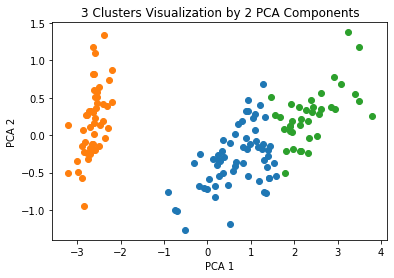

In [8]:
marker0_ind = irisDF[irisDF['cluster'] == 0].index
marker1_ind = irisDF[irisDF['cluster'] == 1].index
marker2_ind = irisDF[irisDF['cluster'] == 2].index

plt.scatter(x=irisDF.loc[marker0_ind, 'pca_x'], y=irisDF.loc[marker0_ind, 'pca_y'],
            marker='o', )
plt.scatter(x=irisDF.loc[marker1_ind, 'pca_x'], y=irisDF.loc[marker1_ind, 'pca_y'],
            marker='o')
plt.scatter(x=irisDF.loc[marker2_ind, 'pca_x'], y=irisDF.loc[marker2_ind, 'pca_y'],
            marker='o')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('3 Clusters Visualization by 2 PCA Components')
plt.show()

오른쪽 두 피처는 분리된 정도가 주황색 피처보다 덜합니다. 

## **1.3. 군집화 알고리즘 테스트를 위한 데이터 생성**

군집화 알고리즘 테스트 용도로 쓰이는 데이터 생성기는 `make_blobs()`, `make_classification()`, `make_circle()`, `make_moon()`입니다. `make_blobs()`와 `make_classification()`는 클래스 하나에 여러 개의 군집이 분포될 수 있도록 데이터를 생성할 수 있고, `make_circle()`과 `make_moon()`는 중심 기반의 군집화로 해결하기 어려운 데이터 세트를 만듭니다.

이 중 `make_blobs()` 생성기를 사용하겠습니다.

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
%matplotlib inline

# 피처 데이터 세트인 X, 군집화 값을 가진 타깃 데이터 세트 y를 반환합니다.
X, y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.8, random_state=0)
print(X.shape, y.shape)

# y 타깃값 분포를 반환합니다.
unique, counts = np.unique(y, return_counts=True)
print(unique, counts)

(200, 2) (200,)
[0 1 2] [67 67 66]


생성한 데이터 세트를 데이터프레임으로 변경하겠습니다.

In [10]:
import pandas as pd

clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y
clusterDF.head(3)

,ftr1,ftr2,target
0,-1.692427,3.622025,2
1,0.697940,4.428867,0
2,1.100228,4.606317,0


시각화하여 군집화 분포를 확인해 보겠습니다.

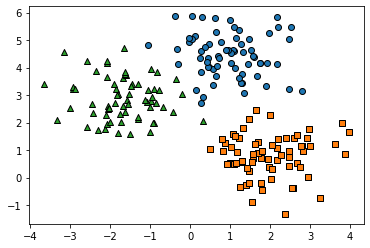

In [11]:
target_list = np.unique(y)
markers = ['o', 's', '^', 'P', 'D', 'H', 'x']
for target in target_list:
    target_cluster = clusterDF[clusterDF['target'] == target]
    plt.scatter(x=target_cluster['ftr1'], y=target_cluster['ftr2'], edgecolor='k',
                marker=markers[target])
plt.show()

생성한 데이터 세트에 KMeans 군집화를 수행하고 시각화해 보겠습니다.



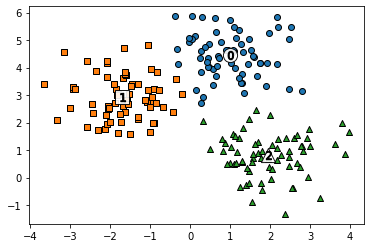

In [12]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=200, random_state=0)
# 피처 데이터 세트 `X`를 군집화합니다.
cluster_labels = kmeans.fit_predict(X)
# 군집화한 결과를 새 칼럼에 덧붙입니다.
clusterDF['kmeans_label'] = cluster_labels

# 개별 클러스터의 중심 위치 좌표를 시각화하기 위해 `cluster_centers_` 속성을 추출합니다.
centers = kmeans.cluster_centers_
# 클러스터 레이블 0, 1, 2를 추출합니다.
unique_labels = np.unique(cluster_labels)

markers = ['o', 's', '^', 'P', 'D', 'H', 'x']

for label in unique_labels:
    label_cluster = clusterDF[clusterDF['kmeans_label'] == label]
    center_x_y = centers[label]
    plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k',
                marker=markers[label])
    # 군집별 중심 위치 좌표를 시각화합니다.
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='white', alpha=0.9,
                edgecolor='k', marker=markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k',
                marker='$%d$' % label)
plt.show()

In [13]:
print(clusterDF.groupby('target')['kmeans_label'].value_counts())

target  kmeans_label
0       0               66
        1                1
1       2               67
2       1               65
        2                1
Name: kmeans_label, dtype: int64


`make_blobs()` 생성기의 `cluster_std` 파라미터를 조정하여 데이터의 표준편차를 바꾸고 시각화해 보겠습니다.

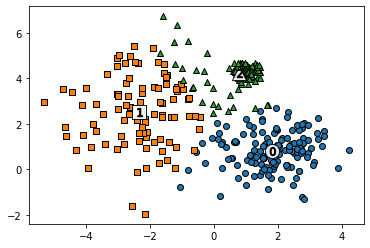

In [14]:
X, y = make_blobs(n_samples=400, n_features=2, centers=3, cluster_std=[0.2, 0.8, 1.6], random_state=0)

clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y

kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=200, random_state=0)
cluster_labels = kmeans.fit_predict(X)
clusterDF['kmeans_label'] = cluster_labels

centers = kmeans.cluster_centers_
unique_labels = np.unique(cluster_labels)

markers = ['o', 's', '^', 'P', 'D', 'H', 'x']

for label in unique_labels:
    label_cluster = clusterDF[clusterDF['kmeans_label'] == label]
    center_x_y = centers[label]
    plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k',
                marker=markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='white', alpha=0.9,
                edgecolor='k', marker=markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k',
                marker='$%d$' % label)
plt.show()

표준편차에 따라 센트로이드에 데이터가 군집하는 정도가 다릅니다.

# **2. 군집 평가(Cluster Evaluation)**

위 붓꽃 데이터 세트의 경우 타깃 레이블이 있으므로 군집화 결과와 이 타깃 레이블을 비교하여 군집화가 이뤄진 정도를 파악할 수 있습니다. 다만 대부분 군집화 데이터 세트는 이렇게 비교할 만한 타깃 레이블이 없습니다.

아울러 군집화는 분류와 비슷해 보이지만 같지 않습니다. 데이터 내에 숨어 있는 별도의 그룹을 찾아서 의미를 부여하거나, 동일한 분류 값에 속하더라도 그 안에서 더 세분화된 군집화를 추구하거나, 서로 다른 분류 값의 데이터도 더 넓은 군집화 레벨화 등의 영역을 가집니다. 

비지도 학습이므로 성능을 정확하게 평가하기 어렵지만, 군집화가 효율적으로 잘 수행되었는지 평가하기 위해 **실루엣 분석**을 사용합니다.

## **2.1. 실루엣 분석의 개요**

**실루엣 분석(Silhouette analysis)**은 각 군집 간의 거리가 얼마나 효율적으로 분리됐는지를 나타냅니다. 다른 군집간 거리는 떨어져 있고 같은 군집끼리의 데이터는 뭉쳐 있으면 효율적으로 잘 분리된 것입니다. 군집화가 잘 될수록 군집은 비슷한 정도의 여유공간을 가지고 떨어져 있습니다. 

실루엣 분석은 **실루엣 계수**를 기반으로 합니다. 이 계수는 개별 데이터가 가지는 군집화 지표입니다. 개별 데이터가 가지는 실루엣 계수는 해당 데이터가 같은 군집 내의 데이터와 얼마나 가깝게 군집화되었고 다른 군집에 있는 데이터와는 얼마나 멀리 분리되었는지 나타내는 지표입니다. 자세한 설명은 본서와 [링크](https://ariz1623.tistory.com/224)를 참고하시기 바랍니다.

실루엣 분석을 위한 메서드는 아래와 같습니다.

- `sklearn.metrics.silhouette_samples(X, labels, metric=’euclidean’, **kwds)`: 인자로 X feature 데이터 세트와 각 피처 데이터 세트가 속한 군집 레이블 값인 labels 데이터를 입력하면 각 데이터 포인트의 실루엣 계수를 계산해 반환합니다.

- `sklearn.metrics.silhouette_score(X, labels, metric=’euclidean’, smaple_szie = None, **kwds)`: 인자로 X feature 데이터 세트와 각 피처 데이터 세트가 속한 군집 레이블 값인 labels 데이터를 입력하면 전체 데이터의 실루엣 계수 값을 평균해 반환합니다. `np.mean(silhouette_samples())`와 같습니다. 이 값이 높을수록 군집화가 어느정도 잘 됐다고 판단할 수 있습니다. 물론 절대적인 기준은 아닙니다.

참고로 좋은 군집화를 이루려면 아래 기준 조건을 만족해야 합니다.

- 전체 실루엣 계수의 평균값인 `silhouette_score()` 값은 0 ~ 1 사이 값을 가지며 1에 가까울수록 좋습니다.

- 전체 실루엣 계수의 평균값과 개별 군집의 평균값은 편차가 크지 않아야 합니다. 개별 군집의 실루엣 계수 평균값이 전체 실루엣 계수의 평균값에서 크게 벗어나지 않는 것이 중요합니다. 전체 실루엣 계수의 평균값이 높을 때 특정 군집의 실루엣 계수 평균값만 높고 다른 군집들의 실루엣 계수 평균값이 낮으면 좋은 군집화 조건이 아닙니다.

## **2.2. 붓꽃 데이터 세트를 이용한 군집 평가**

붓꽃 데이터 세트의 군집화 결과를 실루엣 분석으로 평가해 보겠습니다.

In [15]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

iris = load_iris()
feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
irisDF = pd.DataFrame(data=iris.data, columns=feature_names)
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0).fit(irisDF)
irisDF['cluster'] = kmeans.labels_

score_samples = silhouette_samples(iris.data, irisDF['cluster'])
print('silhoutte_samples()의 return값의 shape:', score_samples.shape)

irisDF['silhouette_coeff'] = score_samples

average_score = silhouette_score(iris.data, irisDF['cluster'])
print('붓꽃 데이터 세트 실루엣 분석 점수: {:.3f}'.format(average_score))
irisDF.head(3)

silhoutte_samples()의 return값의 shape: (150,)
붓꽃 데이터 세트 실루엣 분석 점수: 0.553


,sepal_length,sepal_width,petal_length,petal_width,cluster,silhouette_coeff
0,5.1,3.5,1.4,0.2,1,0.852955
1,4.9,3.0,1.4,0.2,1,0.815495
2,4.7,3.2,1.3,0.2,1,0.829315


군집별 평균 실루엣 계수를 확인해 보겠습니다.

In [16]:
irisDF.groupby('cluster')['silhouette_coeff'].mean()

cluster
0    0.417320
1    0.798140
2    0.451105
Name: silhouette_coeff, dtype: float64

## **2.3. 군집별 평균 실루엣 계수의 시각화를 통한 군집 개수 최적화 방법**

전체 데이터의 평균 실루엣 계수 값이 높다고 반드시 최적의 군집 개수로 군집화된 것은 아닙니다. 특정 군집 내 실루엣 계수 값만 높으면서 다른 군집은 실루엣 계수 값이 낮아도 평균적으로 높은 값을 가질 수 있습니다. 개별 군집별로 적당히 분리된 거리를 유지하면서 군집 내 데이터가 서로 뭉쳐있으면 K-평균의 적절한 군집 개수가 설정된 것입니다.

본서의 해당 파트에서 [링크](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html)의 내용을 다루고 있습니다. 이 링크에서 다루는 내용을 본서의 부록 코드에서 별도로 함수를 선언하여 설명하고 있습니다. 별도로 선언한 함수는 아래와 같습니다. 여러 개의 클러스터링 개수를 리스트로 입력 받아 각각의 실루엣 계수를 면적으로 시각화한 함수입니다.

In [17]:
def visualize_silhouette(cluster_lists, X_features): 
    
    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math
    
    # 입력값으로 클러스터링 개수들을 리스트로 받아서
    # 각 개수별로 클러스터링을 적용하고 실루엣 개수를 구합니다.
    n_cols = len(cluster_lists)
    
    # 리스트에 기재된 클러스터링 수만큼 `sub figures`를 가지는 `axs`를 생성합니다. 
    fig, axs = plt.subplots(figsize=(4 * n_cols, 4), nrows=1, ncols=n_cols)
    
    # 리스트에 기재된 클러스터링 개수들을 차례로 반복하면서 실루엣 개수를 시각화합니다.
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링을 수행하고 실루엣 스코어와 개별 데이터의 실루엣 값을 계산합니다. 
        clusterer = KMeans(n_clusters=n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : ' + str(n_cluster) + '\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)))
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])    # Clear the y axis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 개수별로 `fill_betweenx()` 형태의 막대 그래프를 표현합니다. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels == i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values,
                                   facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

클러스터링을 위한 클러스터 중심 4개의 2차원 데이터 세트 500개를 생성하겠습니다.  

In [18]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=500, n_features=2, centers=4, cluster_std=1,
                  center_box=(-10.0, 10.0), shuffle=True, random_state=1)

클러스터 개수가 2개, 3개, 4개, 5개일때 클러스터별 실루엣 계수 평균값을 시각화하겠습니다.

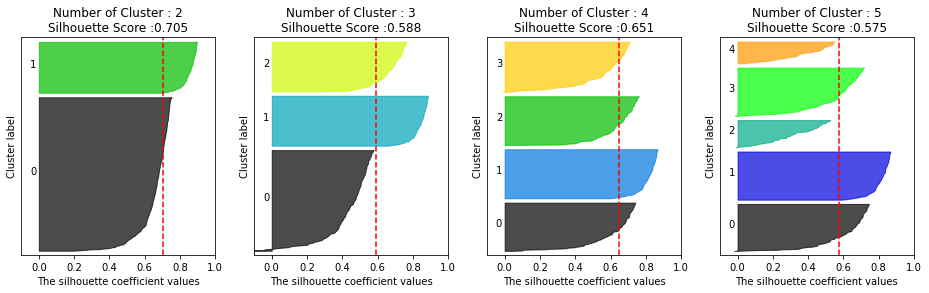

In [19]:
visualize_silhouette([ 2, 3, 4, 5], X)

군집이 4개일 때 최적입니다. 1번 군집은 모든 데이터가 평균보다 높은 계수 값을 가집니다. 0번과 2번은 절반 이상이 평균보다 높은 계수 값을 가집니다. 결론적으로 군집이 2개일 때보다 평균 실루엣 계수 값이 작지만 4개일 때 최적이라고 판단할 수 있습니다.

마지막으로 붓꽃 데이터로 K-평균을 수행할 때 최적 군집 개수를 확인해 보겠습니다.

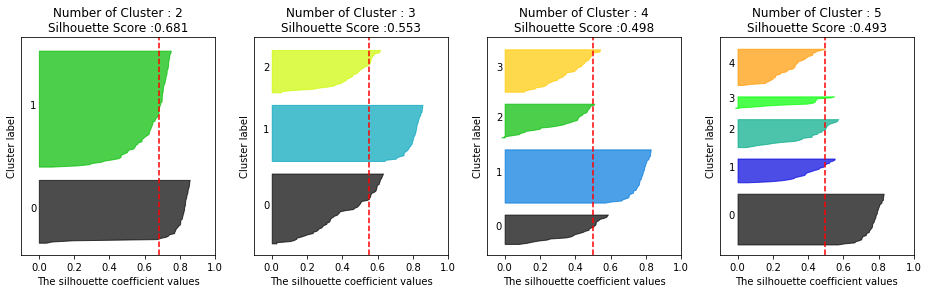

In [20]:
from sklearn.datasets import load_iris

iris = load_iris()
visualize_silhouette([2, 3, 4, 5], iris.data)

군집이 2개일 때 최적입니다.

실루엣 계수를 통한 K-평균 군집 평가 방법은 직관적으로 이해하기는 쉽지만 각 데이터별로 다른 데이터간 거리를 반복하여 계산해야 하므로 데이터 양이 많으면 수행 시간이 오래 걸립니다. 메모리 부족 등 에러가 발생할 가능성도 있습니다. 이러한 경우 군집별로 임의의 데이터를 샘플링하여 실루엣 계수를 평가해 볼 필요가 있습니다.

# **3. 평균 이동**

## **3.1. 평균 이동(Mean shift)의 개요**

**평균 이동** 군집화는 K-평균과 유사하게 중심을 군집의 중심으로 계속 움직이면서 군집화합니다. K-평균은 중심에 소속된 데이터의 평균 거리 중심으로 이동시키지만 평균 이동은 중심을 데이터가 모여 있는 밀도가 가장 높은 곳으로 이동시킵니다.

평균 이동 군집화는 데이터 분포도를 이용하여 센트로이드를 찾으며 **확률 밀도 함수(PDF, Probability Density Function)**를 이용합니다. 확률 밀도 함수는 확률 변수의 분포를 나타내는 함수이며, 정규분포 함수, 감마 분포, t-분포 등이 있습니다. 데이터가 집중적으로 모인(확률 밀도 함수가 피크인) 점을 센트로이드로 선정하며 일반적으로 주어진 모델의 확률 밀도 함수를 찾기 위해 **KDE(Kernel Densitiy Estimation)**을 이용합니다.

평균 이동 군집화는 특정 데이터를 반경 내의 데이터 분포 확률 밀도가 가장 높은 곳으로 이동하기 위해 주변 데이터와의 거리 값을 KDE 함수 값으로 입력하고 반환된 값을 현재 위치에서 업데이트하면서 이동합니다.

KDE는 커널 함수를 통해 어떤 변수의 확률 밀도 함수를 추정하는 방법입니다. 관측된 데이터 각각에 커널 함수를 적용한 값을 모두 더하고 데이터 건수로 나눠 확률 밀도 함수를 추정합니다. 확률 밀도 함수를 알면 특정 변수가 어떤 값을 갖게 될지에 대한 확률을 알게 되므로 이를 통해 변수의 특성(가령 정규 분포의 경우 평균과 분산), 확률 분포 등 변수의 많은 요소를 알 수 있습니다.

KDE는 개별 관측 데이터에 커널 함수를 적용한 뒤 이 적용 값을 모두 더한 후 개별 관측 데이터의 건수로 나눠 확률 밀도 함수를 추정합니다. 대표적인 커널 함수로 가우시안 분포 함수가 사용됩니다. 

이 외 상세한 내용은 본서와 [링크](https://velog.io/@sset2323/07-03.-%ED%8F%89%EA%B7%A0-%EC%9D%B4%EB%8F%99Mean-Shift)를 참고하시기 바랍니다.

일반적으로 평균 이동 군집화는 대역폭이 클수록 평활화된 KDE로 인해 적은 수의 센트로이드를 가지며, 대역폭이 적을수록 많은 수의 센트로이드를 가집니다. 아울러 평균 이동 군집화는 군집 개수를 지정하지 않고 대역폭 크기에 따라 군집화를 수행합니다. 

평균 이동 군집화의 장점은 데이터 세트의 형태를 특정 형태로 가정하거나 특정 분포도 기반의 모델로 가정하지 않으므로 더 유연한 군집화가 가능합니다. 아울러 이상치의 영향력도 크지 않고 미리 군집 개수를 정할 필요가 없습니다. 다만 수행 시간이 오래 걸립니다. 

따라서 평균 이동 군집화는 분석 업무 기반의 데이터 세트보다는 컴퓨터 비전 영역에서 많이 사용됩니다. 특정 개체를 구분하거나 움직임을 추적하는 데 뛰어난 역할을 수행합니다. 

평균 이동 군집화를 구현한 클래스는 `MeanShift`입니다. 주요 초기화 파라미터는 `bandwidth`이며 KDE의 대역폭 h와 같습니다. 대역폭 크기 설정이 군집화 품질에 큰 영향을 미치므로 최적 대역폭을 `estimate_bandwidth()` 메서드로 계산합니다.

아래 예제를 통해 평균 이동 군집화 알고리즘을 적용해 보겠습니다.

In [21]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import MeanShift

X, y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.7, random_state=0)

meanshift = MeanShift(bandwidth=0.8)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형:', np.unique(cluster_labels))

cluster labels 유형: [0 1 2 3 4 5]


군집 6개로 지나치게 세분화됐습니다. 일반적으로 `bandwidth` 값을 낮출수록 군집 개수가 많아집니다.

`bandwidth`를 `1.0`으로 높여보겠습니다.

In [22]:
meanshift = MeanShift(bandwidth=1.0)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형:', np.unique(cluster_labels))

cluster labels 유형: [0 1 2]


군집 3개입니다. 잘 군집화됐습니다.

최적 `bandwidth` 값을 찾기 위해 `estimate_bandwidth()` 메서드를 활용해 보겠습니다.

In [23]:
from sklearn.cluster import estimate_bandwidth

bandwidth = estimate_bandwidth(X)
print('bandwidth 값:', round(bandwidth, 3))

bandwidth 값: 1.816


이 값을 토대로 군집화를 수행해 보겠습니다.

In [24]:
import pandas as pd

clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y

best_bandwidth = estimate_bandwidth(X)

meanshift = MeanShift(bandwidth=best_bandwidth)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형:', np.unique(cluster_labels))

cluster labels 유형: [0 1 2]


예상대로 군집 3개입니다. 구성된 군집을 시각화하고 target 값과 군집 label 값을 비교해 보겠습니다. 

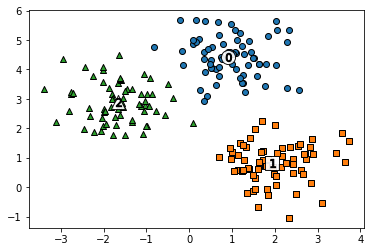

In [25]:
import matplotlib.pyplot as plt

clusterDF['meanshift_label'] = cluster_labels
# 센트로이드 좌표를 객체화합니다.
centers = meanshift.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers = ['o', 's', '^', 'x', '*']

for label in unique_labels:
    label_cluster = clusterDF[clusterDF['meanshift_label'] == label]
    center_x_y = centers[label]

    plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k',
                marker=markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='white', edgecolor='k', 
                alpha=0.9, marker=markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k',
                marker='$%d$' % label)
plt.show()

In [26]:
print(clusterDF.groupby('target')['meanshift_label'].value_counts())

target  meanshift_label
0       0                  67
1       1                  67
2       2                  66
Name: meanshift_label, dtype: int64


# **4. GMM(Gaussian Mixture Model)**

## **4.1. GMM 소개**

**GMM** 군집화는 군집화를 적용할 데이터가 여러 가우시안 분포(정규 분포)를 가진 데이터 집합들이 섞여서 생성된 것이라는 가정하에 군집화를 수행합니다. 전체 데이터 세트는 서로 다른 정규 분포 형태를 가진 여러 가지 확률 분포 곡선으로 구성될 수 있으며, 이 정규 분포 곡선을 추출하여 개별 데이터가 어떤 정규 분포에 속하는지 결정합니다. 자세한 내용은 본서와 [링크](https://studying-haeung.tistory.com/14)를 참고하시기 바랍니다.

이와 같은 방식을 GMM에서는 **모수 추정**이라고 부릅니다. 모수 추정은 개별 정규 분포의 평균과 분산, 각 데이터가 어떤 정규 분포에 해당되는지의 확률을 추정합니다. 이를 위해 GMM은 **EM(Expectation and Maximization)** 방법을 적용합니다. EM 알고리즘에 대한 설명은 [링크](https://modern-manual.tistory.com/46)를 참고하시기 바랍니다.

## **4.2. GMM을 이용한 붓꽃 데이터 세트 군집화**

GMM은 확률 기반 군집화이고 K-평균은 거리 기반 군집화입니다. 두 방식을 붓꽃 데이터 세트에 적용하여 비교해 보겠습니다.

In [27]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

iris = load_iris()
feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

irisDF = pd.DataFrame(data=iris.data, columns=feature_names)
irisDF['target'] = iris.target

kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0).fit(iris.data)
kmeans_cluster_labels = kmeans.predict(iris.data)
irisDF['kmeans_cluster'] = kmeans_cluster_labels
kmeans_iris_result = irisDF.groupby(['target'])['kmeans_cluster'].value_counts()
print(kmeans_iris_result)
print()

gmm = GaussianMixture(n_components=3, random_state=0).fit(iris.data)
gmm_cluster_labels = gmm.predict(iris.data)
irisDF['gmm_cluster'] = gmm_cluster_labels
gmm_iris_result = irisDF.groupby(['target'])['gmm_cluster'].value_counts()
print(gmm_iris_result)

target  kmeans_cluster
0       1                 50
1       0                 48
        2                  2
2       2                 36
        0                 14
Name: kmeans_cluster, dtype: int64

target  gmm_cluster
0       0              50
1       2              45
        1               5
2       1              50
Name: gmm_cluster, dtype: int64


비교적으로 GMM 방식이 군집화를 더 잘 수행했다고 판단할 수 있습니다. 다만 GMM이 더 우월한 알고리즘이라는 결론은 옳지 않습니다. 붓꽃 데이터 세트가 GMM 군집화에 더 효과적이라는 의미일 뿐입니다. 참고로 K-평균은 거리를 기반으로 군집화를 수행하므로 개별 군집 내의 데이터가 원형으로 흩어진 경우 더 효과적이지만 길쭉한 타원형으로 구성된 데이터는 군집화하기 어렵습니다. 아래 파트에서 설명을 이어가겠습니다.

## **4.3. GMM과 K-평균의 비교**

두 알고리즘으로 구현한 군집화를 시각화하는 함수를 본서 부록 소스 코드에서 가져오겠습니다. 이 함수는 클러스터 결과를 담은 데이터프레임과 사이킷런의 Clsuter 객체 등을 인자로 받아 클러스터링 결과를 시각화합니다. 인자는 아래와 같습니다.

- `clusterobj`: 사이킷런의 군집 수행 인스턴스입니다. `Kmeans`, `GaussianMixture` 클래스의 `fit()` 메서드와 `predict()` 메서드로 군집화를 완료한 인스턴스입니다. 만약 군집화 결과 시각화가 아니라 `make_blobs()` 메서드로 생성한 데이터의 시각화이면 `None`을 지정합니다.

- `dataframe`: 피처 데이터 세트와 레이블 값을 가진 데이터프레임입니다.

- `label_name`: 군집화 결과 시각화일 경우 데이터프레임 내의 군집화 레이블 칼럼명입니다. `make_blobs()` 메서드로 생성한 데이터의 시각화이면 데이터프레임 내의 'target' 칼럼명입니다.

- `iscenter`: 사이킷런 Cluster 인스턴스(`clusterobj`)가 군집 중심 좌표(속성인 `cluster_centers_`)를 제공하면 `True`, 제공하지 않으면 `False`입니다.

In [28]:
def visualize_cluster_plot(clusterobj, dataframe, label_name, iscenter=True):
    if iscenter :
        centers = clusterobj.cluster_centers_
        
    unique_labels = np.unique(dataframe[label_name].values)
    markers=['o', 's', '^', 'x', '*']
    isNoise=False

    for label in unique_labels:
        label_cluster = dataframe[dataframe[label_name]==label]
        if label == -1:
            cluster_legend = 'Noise'
            isNoise=True
        else :
            cluster_legend = 'Cluster '+str(label)
        
        plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], s=70,\
                    edgecolor='k', marker=markers[label], label=cluster_legend)
        
        if iscenter:
            center_x_y = centers[label]
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=250, color='white',
                        alpha=0.9, edgecolor='k', marker=markers[label])
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',\
                        edgecolor='k', marker='$%d$' % label)
    if isNoise:
        legend_loc='upper center'
    else: legend_loc='upper right'
    
    plt.legend(loc=legend_loc)
    plt.show()

이제 두 군집화 방식으로 군집화할 데이터 세트를 만들고 시각화해 보겠습니다.

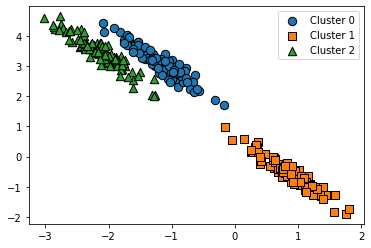

In [29]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=300, n_features=2, centers=3, cluster_std=0.5, random_state=0)

# 길게 늘어진 타원형의 데이터 세트를 생성하기 위해 변환합니다.
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)

clusterDF = pd.DataFrame(data=X_aniso, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y
visualize_cluster_plot(None, clusterDF, 'target', iscenter=False)

`KMeans` 클래스로 군집화를 수행해 보겠습니다.

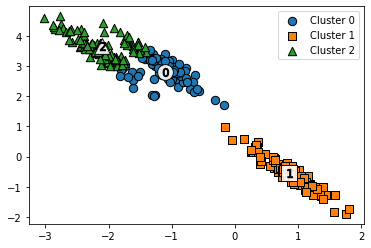

In [30]:
kmeans = KMeans(3, random_state=3)
kmeans_label = kmeans.fit_predict(X_aniso)
clusterDF['kmeans_label'] = kmeans_label

visualize_cluster_plot(kmeans, clusterDF, 'kmeans_label', iscenter=True)

`GuassianMixture` 클래스로 군집화를 수행해 보겠습니다.

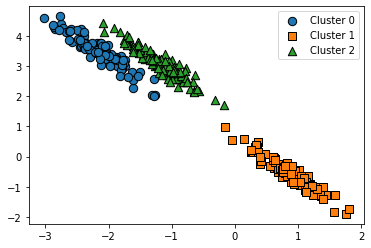

In [31]:
gmm = GaussianMixture(n_components=3, random_state=0)
gmm_label = gmm.fit_predict(X_aniso)
clusterDF['gmm_label'] = gmm_label

# GMM은 군집의 중심 좌표를 구할 수 없으므로 `iscenter`를 `False`로 지정합니다.
visualize_cluster_plot(gmm, clusterDF, 'gmm_label', iscenter=False)

군집화된 상태를 확인해 보겠습니다.

In [32]:
print(clusterDF.groupby('target')['kmeans_label'].value_counts())
print()
print(clusterDF.groupby('target')['gmm_label'].value_counts())

target  kmeans_label
0       0                73
        2                27
1       1               100
2       2                86
        0                14
Name: kmeans_label, dtype: int64

target  gmm_label
0       2            100
1       1            100
2       0            100
Name: gmm_label, dtype: int64


결론적으로 GMM은 KMeans보다 다양한 데이터 세트에 적용하기 좋지만 군집화 수행 시간이 오래 걸립니다.

# **5. DBSCAN(Density Based Spatial Clustering of Applications with Noise)**

## **5.1. DBSCAN 개요**

**DBSCAN**은 밀도 기반 군집화의 대표적인 알고리즘입니다. 간단하고 객관적인 알고리즘이지만 기하학적으로 복잡하게 분포한 데이터 세트도 효과적으로 군집화할 수 있습니다. 

DBSCAN을 구성하는 주요 파라미터 두 개는 **입실론(epsilon)**으로 표기하는 주변 영역, 그리고 이 입실론 주변 영역에 포함되는 최소 데이터 개수인 min point입니다. 다시 말하면, 입실론 주변 영역은 개별 데이터를 중심으로 입실론 반경을 가지는 원형의 영역이고, 최소 데이터 개수는 개별 데이터의 입실론 주변 영역에 포함되는 타 데이터 개수입니다.

입실론 주변 영역 내에 포함되는 최소 데이터 개수를 충족시키는가 아닌가에 따라 데이터 포인트를 아래와 같이 정의합니다.

- 핵심 포인트(Core Point): 입실론 주변 영역 내에 최소 데이터 개수 이상의 타 데이터를 가지고 있는 데이터입니다. 

- 이웃 포인트(Neighbor Point): 입실론 주변 영역 내에 위치한 타 데이터입니다.

- 경계 포인트(Border Point): 입실론 주변 영역 내에 최소 데이터 개수 이상의 이웃 포인트를 가지지 않지만 핵심 포인트를 이웃 포인트로 가진 데이터입니다.

- 잡음 포인트(Noise Point): 최소 데이터 개수 이상의 이웃 포인트를 가지지 않으며, 핵심 포인트도 이웃 포인트로 가지지 않은 데이터입니다.

그림을 토대로 설명한 내용은 본서와 [링크](https://bcho.tistory.com/1205)를 참고하시기 바랍니다.

DBSCAN은 특정 핵심 포인트에서 직접 접근이 가능한 다른 핵심 포인트를 서로 연결하면서 점차적으로 군집화를 수행하고 군집 영역을 확장해 나갑니다. 입실론 주변 영역의 최소 데이터 개수를 포함하는 밀도 기준을 충족시키는 핵심 포인트를 연결하면서 군집화하는 것입니다. 

DBSCAN을 구현한 클래스는 `DBSCAN`입니다. 주요 파라미터는 아래와 같습니다.

- `eps`: 입실론 주변 영역 반경입니다.

- `min_samples`: 핵심 포인트가 되기 위해 입실론 주변 영역 내에 포함되어야 할 데이터의 최소 개수입니다. 자기 데이터를 포함하므로 min points + 1입니다.

## **5.2. DBSCAN 적용하기 - 붓꽃 데이터 세트**

붓꽃 데이터 세트를 DBSCAN으로 군집화해 보겠습니다.




In [33]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.6, min_samples=8, metric='euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)

irisDF['dbscan_cluster'] = dbscan_labels
irisDF['target'] = iris.target

iris_result = irisDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)

target  dbscan_cluster
0        0                49
        -1                 1
1        1                46
        -1                 4
2        1                42
        -1                 8
Name: dbscan_cluster, dtype: int64


0과 1로 군집화됐으며, -1 레이블은 노이즈에 속하는 군집입니다. DBSCAN은 군집 개수를 자동으로 지정하기 때문에 군집 개수를 지정하는 것은 무의미합니다. 특히 붓꽃 데이터 세트는 군집 개수를 3개가 아닌 2개로 해야 군집화 효율이 좋습니다. 

DBSCAN으로 군집화 데이터 세트를 2차원 평면에서 표현하고자 PCA를 이용하여 피처 2개로 압축하여 변환하고, `visualize_cluster_plot()` 함수로 시각화해 보겠습니다.

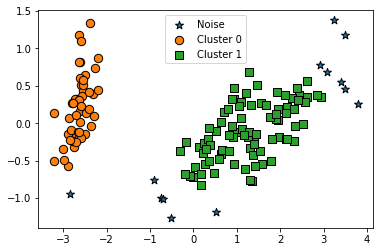

In [34]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=0)
pca_transformed = pca.fit_transform(iris.data)

irisDF['ftr1'] = pca_transformed[:, 0]
irisDF['ftr2'] = pca_transformed[:, 1]

visualize_cluster_plot(dbscan, irisDF, 'dbscan_cluster', iscenter=False)

DBSCAN을 적용할 때 특정 군집 개수로 군집을 강제하지 않는 것이 좋습니다. `eps`와 `min_samples` 파라미터만으로 최적 군집을 찾아야 합니다. 일반적으로 `eps` 값을 크게 하면 반경이 커서 포함하는 데이터가 많아지기 때문에 노이즈 개수가 줄어듭니다. `min_samples` 값을 크게 하면 반경 내에서 더 많은 데이터를 포함하므로 노이즈 개수가 늘어납니다.

`eps=8`로 증가시켜서 확인해 보겠습니다.

In [35]:
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target,kmeans_cluster,gmm_cluster,dbscan_cluster,ftr1,ftr2
0,5.1,3.5,1.4,0.2,0,1,0,0,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,1,0,0,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,1,0,0,-2.888991,-0.144949


target  dbscan_cluster
0        0                50
1        1                50
2        1                47
        -1                 3
Name: dbscan_cluster, dtype: int64


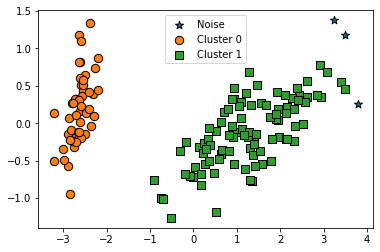

In [36]:
dbscan = DBSCAN(eps=0.8, min_samples=8, metric='euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)

irisDF['dbscan_cluster'] = dbscan_labels
irisDF['target'] = iris.target

iris_result = irisDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)

visualize_cluster_plot(dbscan, irisDF, 'dbscan_cluster', iscenter=False)

노이즈 개수가 줄었습니다.

마지막으로 `eps=0.6`으로 복원하고 `min_samples=16`으로 증가시켜서 확인해 보겠습니다.

target  dbscan_cluster
0        0                48
        -1                 2
1        1                44
        -1                 6
2        1                36
        -1                14
Name: dbscan_cluster, dtype: int64


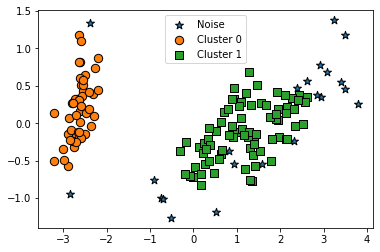

In [37]:
dbscan = DBSCAN(eps=0.6, min_samples=16, metric='euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)

irisDF['dbscan_cluster'] = dbscan_labels
irisDF['target'] = iris.target

iris_result = irisDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)

visualize_cluster_plot(dbscan, irisDF, 'dbscan_cluster', iscenter=False)

## **5.3. DBSCAN 적용하기 - make_circles() 데이터 세트**

`make_circles()` 함수로 2차원 데이터 세트를 만들겠습니다.

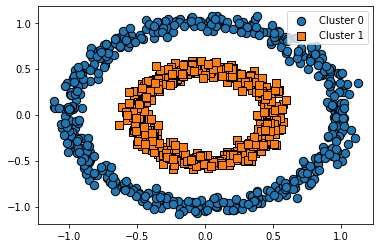

In [39]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=1000, shuffle=True, noise=0.05, random_state=0,
                    factor=0.5)
clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y
visualize_cluster_plot(None, clusterDF, 'target', iscenter=False)

이 데이터 세트에 K-평균과 GMM, DBSCAN을 적용하여 군집화해 보겠습니다.

먼저 K-평균을 적용하겠습니다.

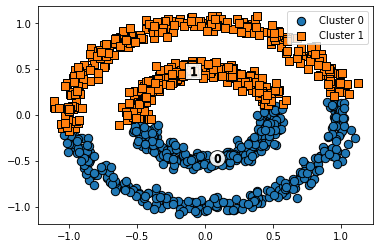

In [40]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, max_iter=1000, random_state=0)
kmeans_labels = kmeans.fit_predict(X)
clusterDF['kmeans_cluster'] = kmeans_labels

visualize_cluster_plot(kmeans, clusterDF, 'kmeans_cluster', iscenter=True)

GMM을 적용하겠습니다.

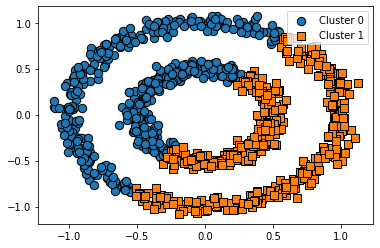

In [43]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=2, random_state=0)
gmm_labels = gmm.fit(X).predict(X)
clusterDF['gmm_cluster'] = gmm_labels

visualize_cluster_plot(gmm, clusterDF, 'gmm_cluster', iscenter=False)

DBSCAN을 적용하겠습니다.

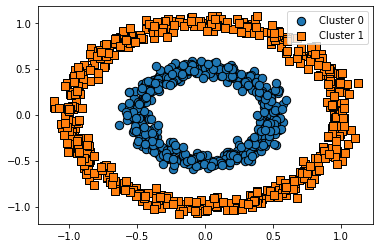

In [73]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.2, min_samples=10, metric='euclidean')
dbscan_labels = dbscan.fit_predict(X)
clusterDF['dbscan_cluster'] = dbscan_labels

visualize_cluster_plot(dbscan, clusterDF, 'dbscan_cluster', iscenter=False)

`eps=0.25`로 지정해 보겠습니다. `min_samples` 값은 고정합니다.

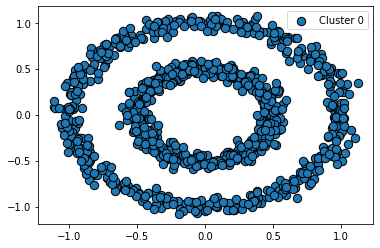

In [81]:
dbscan = DBSCAN(eps=0.25, min_samples=10, metric='euclidean')
dbscan_labels = dbscan.fit_predict(X)
clusterDF['dbscan_cluster'] = dbscan_labels

visualize_cluster_plot(dbscan, clusterDF, 'dbscan_cluster', iscenter=False)

`eps=0.2`로 복원하고 `min_samples=30`으로 지정해 보겠습니다.

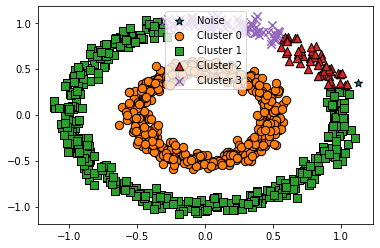

In [83]:
dbscan = DBSCAN(eps=0.2, min_samples=30, metric='euclidean')
dbscan_labels = dbscan.fit_predict(X)
clusterDF['dbscan_cluster'] = dbscan_labels

visualize_cluster_plot(dbscan, clusterDF, 'dbscan_cluster', iscenter=False)

# **6. 군집화 실습 - 고객 세그먼테이션**

## **6.1. 고객 세그먼테이션의 정의와 기법**

고객 세그먼테이션(Customer Segmentation)은 고객 세분화 기법이며 CRM과 마케팅의 기반입니다. 주요 목표는 타깃 마케팅이며, 이는 고객을 여러 특성에 맞게 세분화하여 맞춤형 마케팅이나 서비스를 제공하는 것입니다.

고객 세그먼테이션은 고객의 어떤 요소를 기반으로 군집화할 것인가가 중요합니다. 이를 위해 기본적인 고객 분석 요소인 RFM 기법을 이용하겠습니다. R은 RECENCY(가장 최근 상품 구입일에서 오늘까지 기간), F는 FREQUENCY(상품 구매 횟수), M은 MONETARY VALUE(총 구매 금액)입니다.

## **6.2. 데이터 세트 로딩과 데이터 클렌징**

사용할 데이터 세트는 [Online Retail Data Set](http://archive.ics.uci.edu/ml/datasets/online+retail)에서 다운로드했습니다. 피처에 대한 설명은 링크의 Data Set Description를 참고하시기 바랍니다.

데이터를 준비하겠습니다.

In [3]:
from google.colab import drive
drive.mount('/content/gdrive/')
import pandas as pd
import numpy as np
import datetime
import math
import matplotlib.pyplot as plt

retail_df = pd.read_excel(io='/content/gdrive/MyDrive/Online Retail/Online Retail.xlsx')
retail_df.head(3)

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom


In [4]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


'CustomerID' 피처의 결측치가 많습니다. 고객 세그먼테이션을 수행하므로 이 피처가 Null이면 고객을 특정할 수 없으므로 가치가 없습니다. 삭제해야 마땅합니다.

다른 피처들도 하나씩 살펴보겠습니다. 숫자로 이뤄진 피처 중 주문량인 'Quantity' 피처와 제품 단가인 'UnitPrice' 피처에 비정상적인 값(음수)이 존재하는지 확인하겠습니다.

In [33]:
print(retail_df[retail_df['Quantity'] < 0]['Quantity'].value_counts().sum())
print(retail_df[retail_df['UnitPrice'] < 0]['UnitPrice'].value_counts().sum())

10624
2


음수가 존재합니다. 양수인 값만 필터링해야 합니다.

'CustomerID', 'Quantity', 'UnitPrice' 피처를 불린 인덱싱으로 필터링하여 데이터프레임을 새로 구성하겠습니다.

In [34]:
retail_df = retail_df[retail_df['CustomerID'].notnull()]
retail_df = retail_df[retail_df['Quantity'] > 0]
retail_df = retail_df[retail_df['UnitPrice'] > 0]
print(retail_df.shape)
retail_df.isnull().sum()

(397884, 8)


InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

마지막으로 'Country' 피처를 살펴보겠습니다.

In [35]:
retail_df['Country'].value_counts()

United Kingdom          354321
Germany                   9040
France                    8341
EIRE                      7236
Spain                     2484
Netherlands               2359
Belgium                   2031
Switzerland               1841
Portugal                  1462
Australia                 1182
Norway                    1071
Italy                      758
Channel Islands            748
Finland                    685
Cyprus                     614
Sweden                     451
Austria                    398
Denmark                    380
Poland                     330
Japan                      321
Israel                     248
Unspecified                244
Singapore                  222
Iceland                    182
USA                        179
Canada                     151
Greece                     145
Malta                      112
United Arab Emirates        68
European Community          60
RSA                         57
Lebanon                     45
Lithuani

영국 국적인 고객이 주고객입니다.

영국이 아닌 국가는 제외하여 데이터를 재구성하겠습니다.

In [36]:
retail_df = retail_df[retail_df['Country'] == 'United Kingdom']
retail_df.shape

(354321, 8)

## **6.3. RFM 기반 데이터 가공**

고객 세그먼테이션 군집화를 수행하기 전에 RFM을 기반으로 데이터를 더 가공할 필요가 있습니다. 일단 'UnitPrice' 피처와 'Quantity' 피처를 곱하여 총 주문 금액 피처를 생성하겠습니다.

In [37]:
retail_df['sale_amount'] = retail_df['Quantity'] * retail_df['UnitPrice']
retail_df['sale_amount']

0          15.30
1          20.34
2          22.00
3          20.34
4          20.34
           ...  
541889     23.40
541890     23.60
541891     30.00
541892    214.80
541893     70.80
Name: sale_amount, Length: 354321, dtype: float64

'CustomerID' 피처의 타입은 실수형입니다. 식별하기 쉽도록 정수형으로 바꾸겠습니다.

In [38]:
retail_df['CustomerID'] = retail_df['CustomerID'].astype(int)

고객별 주문 건수를 확인해 보겠습니다.

In [44]:
print(retail_df['CustomerID'].value_counts())

17841    7847
14096    5111
12748    4595
14606    2700
15311    2379
         ... 
17752       1
16742       1
13120       1
16144       1
17956       1
Name: CustomerID, Length: 3920, dtype: int64


고객별 총 주문액을 확인해 보겠습니다.

In [45]:
print(retail_df.groupby('CustomerID')['sale_amount'].sum().sort_values(ascending=False))

CustomerID
18102    259657.30
17450    194550.79
16446    168472.50
17511     91062.38
16029     81024.84
           ...    
16878        13.30
17956        12.75
16454         6.90
14792         6.20
16738         3.75
Name: sale_amount, Length: 3920, dtype: float64


특정 고객 몇 명의 주문 건수와 주문 금액이 매우 높습니다.

전형적인 판매 데이터는 주문번호 + 상품코드 레벨의 식별자로 구성됩니다. 이 데이터 세트 역시 'InvoiceNo' + 'StockCode'로 그룹화하면 1에 가깝게 유일한 식별자 레벨이 됩니다. 이를 확인해 보겠습니다.

In [53]:
retail_df.groupby(['InvoiceNo', 'StockCode'])['InvoiceNo'].count().mean()

1.028702077315023

RFM 기반의 고객 세그먼테이션이므로 고객 레벨로 주문 기간, 주문 횟수, 주문 금액 데이터를 기반으로 세그먼테이션을 수행하겠습니다. 주문번호+상품코드 기준의 데이터를 고객 기준의 R, F, M 데이터로 변경하겠습니다. 이를 위해 주문번호 기준 데이터를 개별 고객 기준 데이터로 그룹화해야 합니다.



---

고민 중

---



## **6.4. RFM 기반 고객 세그먼테이션**

# **7. 정리**